In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import pathlib
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
# Suppress TensorFlow logging (1)
# Suppress TensorFlow logging (2)
# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
IMAGE_PATHS = 'test_images/'


In [3]:
PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"


In [4]:
PATH_TO_MODEL_DIR = './training/TF2/training/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model/'


In [5]:
print(PATH_TO_MODEL_DIR)


./training/TF2/training/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8/saved_model/saved_model/


In [6]:
PATH_TO_LABELS = './data/label_map.pbtxt'


In [7]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR
print('Loading model...', end='')
start_time = time.time()
# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))



Loading model...Done! Took 15.013555765151978 seconds


In [8]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)


Running inference for test_images/pica_pica_test2.jpg... Done
Running inference for test_images/Erithacus_Rubecula_test5.jpeg... Done
Running inference for test_images/pica_pica_test4.jpeg... Done
Running inference for test_images/pica_pica_test3.jpg... Done
Running inference for test_images/pica_pica_test1.jpg... Done
Running inference for test_images/Erithacus_Rubecula_test1.jpg... Done
Running inference for test_images/Periparus_ater_test3.jpg... Done
Running inference for test_images/Periparus_ater_test2.jpg... Done
Running inference for test_images/periparus_test5.jpeg... Done
Running inference for test_images/Erithacus_Rubecula_test4.jpg... Done
Running inference for test_images/Periparus_ater_test4.jpg... Done
Running inference for test_images/pica_pica_test5.jpeg... Done


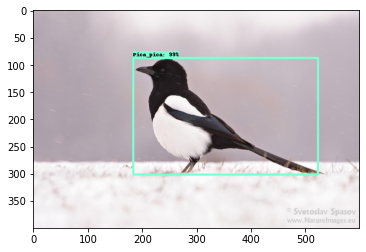

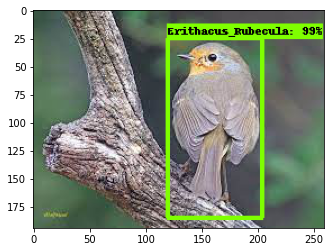

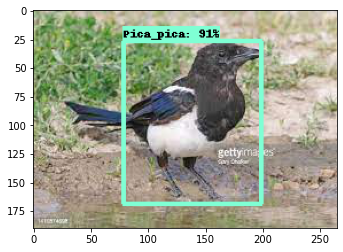

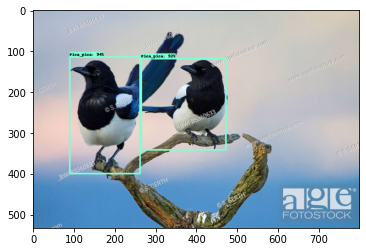

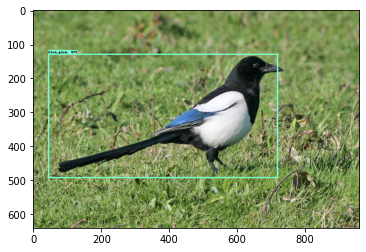

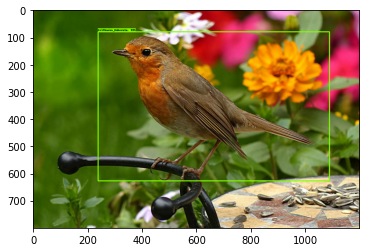

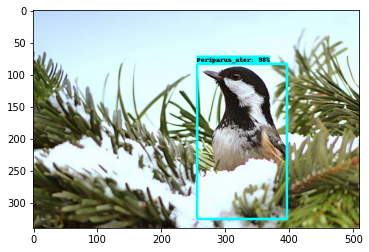

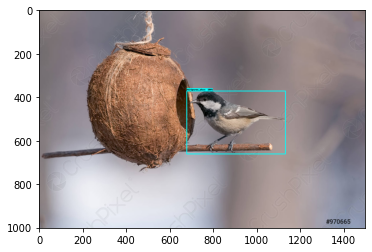

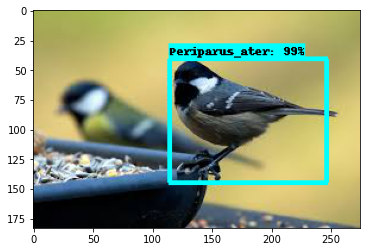

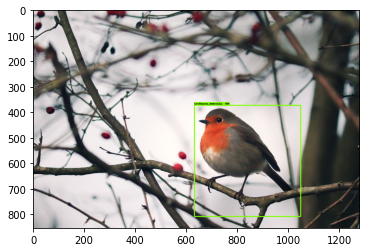

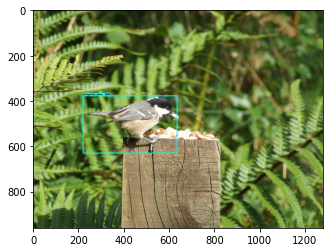

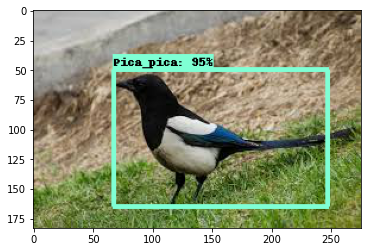

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')
# Suppress Matplotlib warnings
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
    path: the file path to the image
    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))
for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path)
    print('Running inference for {}... '.format(image_path), end='')
    image_np = load_image_into_numpy_array(image_path)
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()
    # Convert image to grayscale
    # image_np = np.tile(
    # np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]
    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)
    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimensi
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
        for key, value in detections.items()}
    detections['num_detections'] = num_detections
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(int)
    image_np_with_detections = image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_detections,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=.75,
        agnostic_mode=False)
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()
# sphinx_gallery_thumbnail_number = 2
